In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes, fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'svg'

from sklearn import tree
from dtreeviz.trees import *

## Regression

In [2]:
df_cars = pd.read_csv("../data/cars.csv")
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']

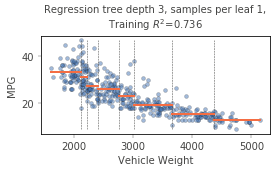

In [3]:
fig, ax = plt.subplots(1,1, figsize=(4,2.5))
t = rtreeviz_univar(ax,
                    X['WGT'], y,
                    max_depth=3,
                    feature_name='Vehicle Weight',
                    target_name='MPG',
                    fontsize=10,
                    colors={'scatter_edge': 'black'})
plt.tight_layout()
plt.show()

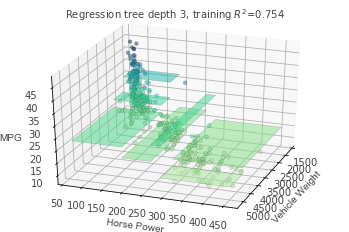

In [4]:
rtreeviz_bivar_3D(None,
                 X[['WGT','ENG']], y,
                 max_depth=3,
                 feature_names=['Vehicle Weight', 'Horse Power'],
                 target_name='MPG',
                 fontsize=10,
                 elev=30,
                 azim=20,
                 dist=10,
                 show={'splits','title'},
                 colors={'tesselation_alpha':.5})

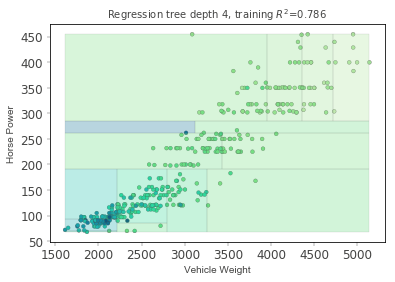

In [5]:
rtreeviz_bivar_heatmap(None,
                       X[['WGT','ENG']], y,
                       feature_names=['Vehicle Weight', 'Horse Power'],
                       max_depth=4,
                       fontsize=10)

## Classification

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


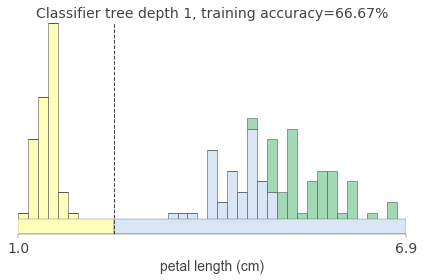

In [6]:
iris = load_iris()
X = iris.data
y = iris.target
len(X), len(y)

feature_names = iris.feature_names
class_names = list(iris.target_names)
print(feature_names)
figsize = (6,2)
X = X[:,2]
ct = ctreeviz_univar(None, X, y, max_depth=1,
                     feature_name = 'petal length (cm)', class_names=class_names,
                     target_name='iris',
                     nbins=40, gtype='barstacked',
                     show={'splits','title'})
plt.tight_layout()
plt.show()

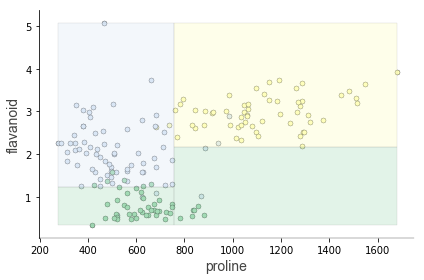

In [7]:
from dtreeviz.trees import *

wine = load_wine()
X = wine.data
y = wine.target
len(X), len(y)

colors = {'classes':
          [None, # 0 classes
          None, # 1 class
          ["#FEFEBB","#a1dab4"], # 2 classes
          ["#FEFEBB","#D9E6F5",'#a1dab4'], # 3
          ]
         }

feature_names = wine.feature_names
class_names = list(wine.target_names)
X = X[:,[12,6]]
ct = ctreeviz_bivar(None, X, y, max_depth=2,
                     feature_names = ['proline','flavanoid'], class_names=class_names,
                     target_name='iris',
                     show={'splits'},
                     colors={'scatter_edge': 'black'}
                   )
plt.tight_layout()
plt.show()